In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Honey Bee Health Data

In [2]:
bees = pd.read_csv("data/bee_data.csv")
bees

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
...,...,...,...,...,...,...,...,...,...
5167,027_011.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5168,027_007.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,True,worker
5169,027_013.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker
5170,027_012.png,8/20/18,10:03,"San Jose, CA, USA",95124,-1,healthy,False,worker


The data consists of pictures of bees (which are not here, but the same data set including the pictures seems to be [here](https://www.kaggle.com/datasets/jenny18/honey-bee-annotated-images)) and a CSV file containing the time each picture was taken, the location, the subspecies of the bee in each picture, whether the bee was carrying pollen or not, the caste (worker, drone, queen) of the bee in each picture, and the health status of the bee in each picture.

### Visualize and Summarize

#### Missing data

Initially, there don't appear to be any missing values.

In [3]:
bees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file             5172 non-null   object
 1   date             5172 non-null   object
 2   time             5172 non-null   object
 3   location         5172 non-null   object
 4   zip code         5172 non-null   int64 
 5   subspecies       5172 non-null   object
 6   health           5172 non-null   object
 7   pollen_carrying  5172 non-null   bool  
 8   caste            5172 non-null   object
dtypes: bool(1), int64(1), object(7)
memory usage: 328.4+ KB


#### Combine date and time columns

In [4]:
bees['datetime'] = pd.to_datetime(bees.date + ' ' + bees.time, format='%m/%d/%y %H:%M')
bees.drop(['date', 'time'], axis=1, inplace=True)
bees.rename(columns={'datetime': 'time'}, inplace=True)
bees

,file,location,zip code,subspecies,health,pollen_carrying,caste,time
0,041_066.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,2018-08-28 16:07:00
1,041_072.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,2018-08-28 16:07:00
2,041_073.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,2018-08-28 16:07:00
3,041_067.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,2018-08-28 16:07:00
4,041_059.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,2018-08-28 16:07:00
...,...,...,...,...,...,...,...,...
5167,027_011.png,"San Jose, CA, USA",95124,-1,healthy,True,worker,2018-08-20 10:03:00
5168,027_007.png,"San Jose, CA, USA",95124,-1,healthy,True,worker,2018-08-20 10:03:00
5169,027_013.png,"San Jose, CA, USA",95124,-1,healthy,False,worker,2018-08-20 10:03:00
5170,027_012.png,"San Jose, CA, USA",95124,-1,healthy,False,worker,2018-08-20 10:03:00


#### Data collection dates and times

The data points were collected on 16 different days spanning 68 days during the summer of 2018. The number of points per day is widely distributed with a minimum of 23 and a maximum of 1080.

Number of dates: 16
Date range: 2018-07-02 to 2018-09-08
Duration: 68 days
Minimum number of points per day: 23 on 2018-09-08
Maximum number of points per day: 1080 on 2018-08-21


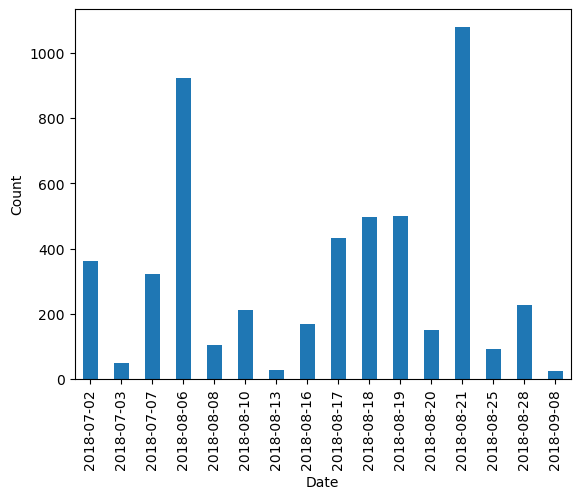

In [5]:
# Date counts to dataframe
date_counts = pd.DataFrame(bees.time.dt.date.value_counts())
date_counts.sort_index(inplace=True)
date_counts.reset_index(inplace=True)
date_counts.rename(columns={'time': 'count', 'index': 'date'}, inplace=True)

# Number of unique dates
print('Number of dates:', len(date_counts))

# Date range
print('Date range:', date_counts['date'].iloc[0], 'to', date_counts['date'].iloc[-1])

# Duration of data
print('Duration:', (date_counts['date'].iloc[-1] - date_counts['date'].iloc[0]).days, 'days')

# Minimum number of data points on days when data was collected
ind = np.argmin(date_counts['count'])
print('Minimum number of points per day:', 
      date_counts['count'].iloc[ind], 
      'on', 
      date_counts['date'].iloc[ind])

# Maximum number of data points on days when data was collected
ind = np.argmax(date_counts['count'])
print('Maximum number of points per day:', 
      date_counts['count'].iloc[ind], 
      'on', 
      date_counts['date'].iloc[ind])

# Bar plot of date counts
date_counts.plot(kind='bar', x='date', y='count', xlabel='Date', ylabel='Count', legend=None);

Data were collected between the hours of 8 am and 10 pm. The most common periods were 12 pm to 2 pm and 3 pm to 4 pm.

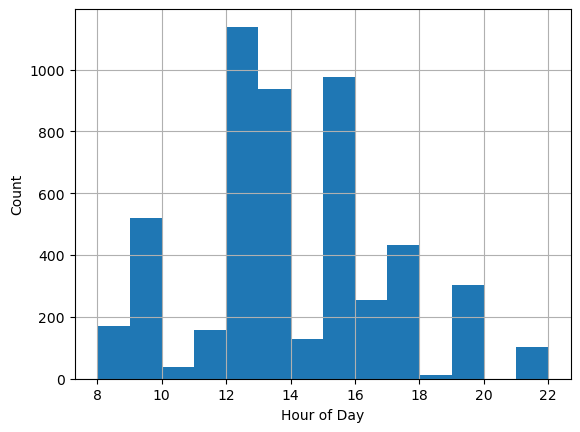

In [6]:
(bees.time.dt.hour + bees.time.dt.minute/60).hist(bins=np.arange(8, 23, 1))
plt.xlabel('Hour of Day')
plt.ylabel('Count');

#### Data collection locations

All 7 data locations were in the USA in 6 different states. The most data came from CA (Saratoga and San Jose), followed by GA (Athens), IA (Des Moines), TX (Alvin), and NH (Keene).

In [7]:
# Some Georgia locations use "Georgia", standardize to "GA". Convert to category type.
bees['location'] = bees['location'].str.replace('Georgia', 'GA').astype('category')

# Location counts
location_counts = bees['location'].value_counts()
print('Number of locations:', len(location_counts))
print('\n')
print(location_counts)

Number of locations: 7


Saratoga, CA, USA       2000
Athens, GA, USA         1051
Des Moines, IA, USA      973
Alvin, TX, USA           737
New Orleans, LA, USA     170
San Jose, CA, USA        149
Keene, NH, USA            92
Name: location, dtype: int64


In [8]:
# Extract states from locations
bees['state'] = bees['location'].str.split(',').str[1].astype('category')

# State counts
state_counts = bees['state'].value_counts()
print('Number of states:', len(state_counts))
print('\n')
print(state_counts)

Number of states: 6


 CA    2149
 GA    1051
 IA     973
 TX     737
 LA     170
 NH      92
Name: state, dtype: int64


#### Bee subspecies

There are 428 data points with a subpecies of -1 which probably means unknown or unrecorded. The 472 data points with a subspecies of "1 Mixed local stock 2" likely means that there was a mixture of subspecies in the hive. A description of the data is needed to verify these assumptions. If the assumptions are correct, then 17.4% of the data has an unidentified subpecies and these should either be considered missing values or the pictures with an unknown subspecies might possibly be predicted using a model trained on the pictures with known subspecies.

Italian honey bee        3008
Russian honey bee         527
Carniolan honey bee       501
1 Mixed local stock 2     472
-1                        428
VSH Italian honey bee     199
Western honey bee          37
Name: subspecies, dtype: int64


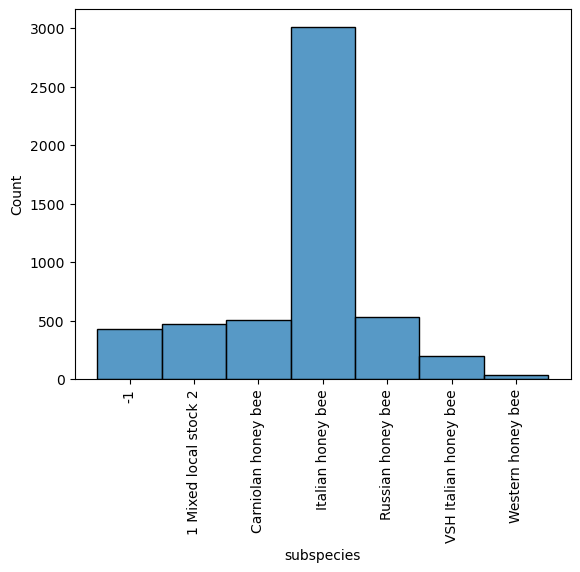

In [9]:
# Convert to category type
bees['subspecies'] = bees['subspecies'].astype('category')      

# Subspecies counts
subspecies_counts = bees.subspecies.value_counts()
print(subspecies_counts)

# Histogram of subspecies counts
plt.xticks(rotation=90)
sns.histplot(bees.subspecies);

In [10]:
# Fraction of pictures with subspecies likely unknown
(np.sum(bees.subspecies == '-1') + np.sum(bees.subspecies == '1 Mixed local stock 2'))/bees.shape[0]

0.1740139211136891

#### Pollen carrying

There are only 18 data points where the bee was carrying pollen, but 5154 data points where the bee was not carrying pollen.

In [11]:
# Convert to Boolean type
bees['pollen_carrying'] = bees['pollen_carrying'].astype('bool')

# Pollen carrying counts
print(bees['pollen_carrying'].value_counts())

False    5154
True       18
Name: pollen_carrying, dtype: int64


#### Bee health

There are 3384 pictures of healthy bees and 1788 of bees with health problems from 5 different categories. Without a description, some of the health categories are unclear. Does "few varrao, hive beetles" mean "few varroa and few hive beetles" or "few varroa and a significant number of hive beetles"? Does "Small Hive Beetles" mean that the beetles are small in size or that there are a small number of them. Should the "few varrao, hive beetles" and "Varroa, Small Hive Beetles" categories be combined?

In [12]:
# Convert to category type
bees['health'] = bees['health'].astype('category')  

# Health category counts
health_counts = bees.health.value_counts()

# Number of health categories
print('Number of health categories:', len(health_counts))
print('\n')
print(health_counts)

# Number of pictures with unhealthy bees
unhealthy_count = np.sum(bees.health != 'healthy')
print('\n')
print('Number of pictures with unhealthy bees:', unhealthy_count)

Number of health categories: 6


healthy                       3384
few varrao, hive beetles       579
Varroa, Small Hive Beetles     472
ant problems                   457
hive being robbed              251
missing queen                   29
Name: health, dtype: int64


Number of pictures with unhealthy bees: 1788


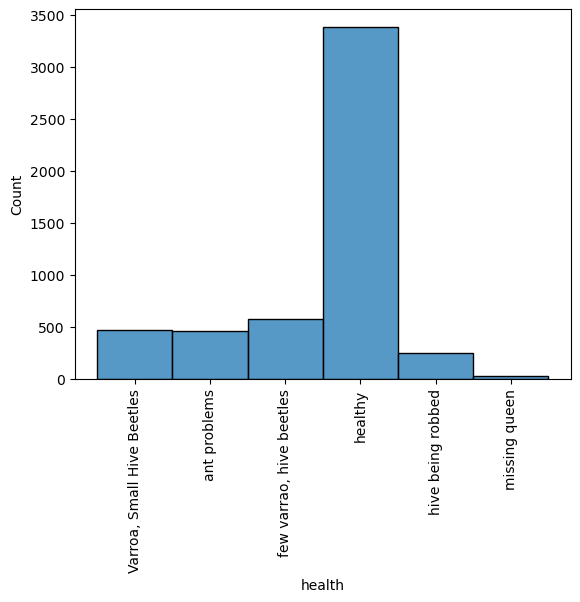

In [13]:
# Histogram of health category counts
plt.xticks(rotation=90)
sns.histplot(bees['health']);

#### Bee caste

The pictures are all of worker bees.

In [14]:
# Caste counts
bees.caste.value_counts()

worker    5172
Name: caste, dtype: int64

### Summary

- There are relatively few images and corresponding rows of data.
- The data were collected in summer months of only one year (2018) during the day.
- There are likely 17.4% missing values in subspecies.
- Class imbalances
  - location (minimum of 92 images from Keene, NH and maximum of 2000 from Saratoga, CA)
  - subspecies (minimum of 37 images of Western honey bees and maximum of 3008 of Italian honey bees)
  - pollen_carrying (18 images of bees carrying pollen and 5154 of bees not carrying pollen)
  - health (minimum of 3384 images of healthy bees and maximum of 29 of bees with a missing queen)
    - If the goal is just to predict health or unhealthy (combine all unhealthy categories into one), then the class imbalance would not be too bad.